In [5]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("updated_file_with_topics.csv")

# Create a function to map topics to narratives
def map_topic_to_narrative(topic):
    if topic in ['Topic 3']:
        return "advising"
    elif topic in ['Topic 1', 'Topic 4']:
        return "evaluating"
    elif topic in ['Topic 5', 'Topic 6', 'Topic 2']:
        return "enthusing"
    elif topic in ['Topic 7', 'NA']:
        return "educating"

# Apply the mapping function to the 'topic' column and create the 'narrative' column
data['narrative'] = data['topic'].apply(map_topic_to_narrative)

# Save the updated DataFrame back to the CSV file
data.to_csv("updated_file_with_topics.csv", index=False)


In [305]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Perform ANOVA to test relationship between topic types and number of likes
anova_likes = ols('Likes ~ topic', data=data).fit()
anova_results = anova_lm(anova_likes)

# Print ANOVA results
print(anova_results)

              df        sum_sq       mean_sq          F        PR(>F)
topic        6.0  3.460971e+13  5.768285e+12  18.658077  1.771062e-21
Residual  3572.0  1.104311e+15  3.091575e+11        NaN           NaN


In [306]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import MultiComparison

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Select relevant columns for MANCOVA
dependent_vars = ['Likes', 'Comment']
independent_vars = ['narrative', 'SponsorPost']

# Convert independent variables to categorical
for var in independent_vars:
    data[var] = data[var].astype('category')

# Standardize Likes and Comment based on the number of followers (Z-score normalization)
data['Likes_zscore'] = (data['Likes'] - data['Followers'].mean()) / data['Followers'].std()
data['Comment_zscore'] = (data['Comment'] - data['Followers'].mean()) / data['Followers'].std()

# Perform MANCOVA
manova_data = data[['Likes_zscore', 'Comment_zscore', 'narrative', 'SponsorPost']]

# Fit the MANOVA model
manova_model = MANOVA.from_formula('Likes_zscore + Comment_zscore ~ narrative + SponsorPost', data=manova_data)

# Print the MANOVA results
print(manova_model.mv_test())

# Univariate tests for Likes and Comment separately
for var in dependent_vars:
    univ_model = ols(f'{var}_zscore ~ narrative + SponsorPost', data=data).fit()
    print(f"\nUnivariate Test for {var}:")
    print(univ_model.summary())

# Post-hoc tests for each dependent variable using Tukey's HSD
for var in dependent_vars:
    mc = MultiComparison(data[f'{var}_zscore'], data['narrative'])
    posthoc_results = mc.tukeyhsd()
    print(f"\nPost-hoc Test (Tukey's HSD) for {var}:")
    print(posthoc_results)


                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept          Value    Num DF   Den DF     F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda     0.0000 2.0000 3573.0000 45582503.5450 0.0000
         Pillai's trace     1.0000 2.0000 3573.0000 45582503.5450 0.0000
 Hotelling-Lawley trace 25514.9754 2.0000 3573.0000 45582503.5450 0.0000
    Roy's greatest root 25514.9754 2.0000 3573.0000 45582503.5450 0.0000
------------------------------------------------------------------------
                                                                        
--------------------------------------------------------------------------
         narrative          Value    Num DF     Den DF    F Value   Pr > F
-----------------------------------------------------------------------

In [307]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")
# Standardize Likes and Comment based on the number of followers (Z-score normalization)
data['Likes_zscore'] = (data['Likes'] - data['Followers'].mean()) / data['Followers'].std()
data['Comment_zscore'] = (data['Comment'] - data['Followers'].mean()) / data['Followers'].std()

# (1) Test whether the number of comments changes with the type of narratives (ANOVA)
anova_comments = ols('Comment_zscore ~ C(narrative)', data=data).fit()
print(anova_lm(anova_comments))

# (2) Test whether the number of likes changes with the type of narratives (ANOVA)
anova_likes = ols('Likes_zscore ~ C(narrative)', data=data).fit()
print(anova_lm(anova_likes))

# (3) Test the impact of each narrative on engagement (Likes) using linear regression
engagement_likes_model = ols('Likes_zscore ~ C(narrative)', data=data).fit()
print(engagement_likes_model.summary())

# (4) Test the impact of each narrative on engagement (Comments) using linear regression
engagement_comments_model = ols('Comment_zscore ~ C(narrative)', data=data).fit()
print(engagement_comments_model.summary())

# (5) Test whether the sponsor influences the likes of each type of narratives (ANCOVA)
ancova_likes_model = ols('Likes_zscore ~ C(narrative) + C(SponsorPost)', data=data).fit()
print(ancova_likes_model.summary())

# (6) Test whether the sponsor influences the comments of each type of narratives (ANCOVA)
ancova_comments_model = ols('Comment_zscore ~ C(narrative) + C(SponsorPost)', data=data).fit()
print(ancova_comments_model.summary())


                  df    sum_sq   mean_sq         F    PR(>F)
C(narrative)     3.0  0.000180  0.000060  7.206312  0.000081
Residual      3575.0  0.029728  0.000008       NaN       NaN
                  df     sum_sq   mean_sq          F        PR(>F)
C(narrative)     3.0   1.840298  0.613433  34.168675  9.113479e-22
Residual      3575.0  64.182215  0.017953        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:           Likes_zscore   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     34.17
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           9.11e-22
Time:                        23:03:08   Log-Likelihood:                 2117.4
No. Observations:                3579   AIC:                            -4227.
Df Residuals:                    3575   BIC:                   

In [308]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import MultiComparison

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Convert 'narrative' and 'SponsorPost' to category data type
data['narrative'] = data['narrative'].astype('category')
data['SponsorPost'] = data['SponsorPost'].astype('category')


# Convert 'Likes' and 'Comment' to numeric data type, converting non-numeric values to NaN
data['Likes'] = pd.to_numeric(data['Likes'], errors='coerce')
data['Comment'] = pd.to_numeric(data['Comment'], errors='coerce')

# Drop rows with NaN values in 'Likes' or 'Comment'
data.dropna(subset=['Likes', 'Comment'], inplace=True)

# (1) Test whether there is a relationship between narrative types and number of likes (ANOVA)
anova_likes = ols('Likes ~ narrative', data=data).fit()
print("ANOVA for Likes:")
print(anova_lm(anova_likes))

# (2) Test whether there is a relationship between narrative types and number of comments (ANOVA)
anova_comments = ols('Comment ~ narrative', data=data).fit()
print("\nANOVA for Comments:")
print(anova_lm(anova_comments))

independent_vars = ['narrative', 'SponsorPost']
dependent_vars = ['Likes', 'Comment']

# Perform MANCOVA
manova_data = data[dependent_vars + independent_vars]
manova_data.loc[:, independent_vars] = manova_data.loc[:, independent_vars].astype('category')

# Print the unique values in the 'narrative' column to check for 'advising'
print("Unique values in 'narrative' column:", manova_data['narrative'].unique())

# Fit the MANOVA model
manova_model = MANOVA.from_formula(f"{'+'.join(dependent_vars)} ~ {'+'.join(independent_vars)}", data=manova_data)

# Print the MANOVA results
print("MANOVA Results:")
print(manova_model.mv_test())

# Print coefficients to determine the direction of relationships
print("\nCoefficients:")
for var in dependent_vars:
    print(f"{var}:")
    model = ols(f"{var} ~ {'+'.join(independent_vars)}", data=data).fit()
    print(model.summary())

data.to_csv("updated_file_with_topics.csv", index=False)






ANOVA for Likes:
               df        sum_sq       mean_sq          F        PR(>F)
narrative     3.0  3.174603e+13  1.058201e+13  34.168675  9.113479e-22
Residual   3575.0  1.107174e+15  3.096991e+11        NaN           NaN

ANOVA for Comments:
               df        sum_sq       mean_sq         F    PR(>F)
narrative     3.0  3.101155e+09  1.033718e+09  7.206312  0.000081
Residual   3575.0  5.128203e+11  1.434462e+08       NaN       NaN
Unique values in 'narrative' column: ['enthusing', 'evaluating', 'educating', 'advising']
Categories (4, object): ['advising', 'educating', 'enthusing', 'evaluating']
MANOVA Results:
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9995 2.0000 3573.0000  0.8261 0.4378
         

/var/folders/zz/hdzk93rd6qzfcy911s_7shv00000gn/T/ipykernel_19093/4136206762.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manova_data.loc[:, independent_vars] = manova_data.loc[:, independent_vars].astype('category')
/var/folders/zz/hdzk93rd6qzfcy911s_7shv00000gn/T/ipykernel_19093/4136206762.py:39: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  manova_data.loc[:, independent_vars] = manova_data.loc[:, independent_vars].astype('category')


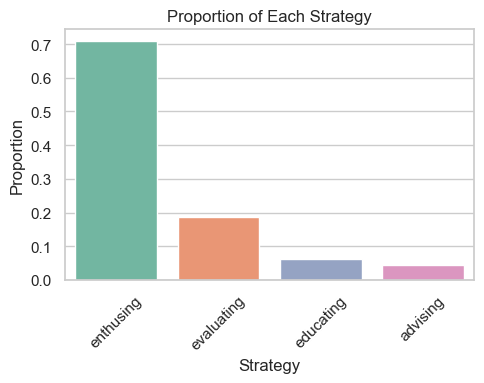


Mean and SD for Likes and Comments of each narrative:
    narrative           mean            std
0    advising   33438.484472  122008.753138
1   educating  150203.822727  228184.521078
2   enthusing  353892.596290  617072.283770
3  evaluating  189872.646084  440893.302130
    narrative         mean           std
0    advising   280.354037    673.765653
1   educating   750.127273   2199.899062
2   enthusing  2954.657459  13885.493336
3  evaluating  1170.926205   5929.173844


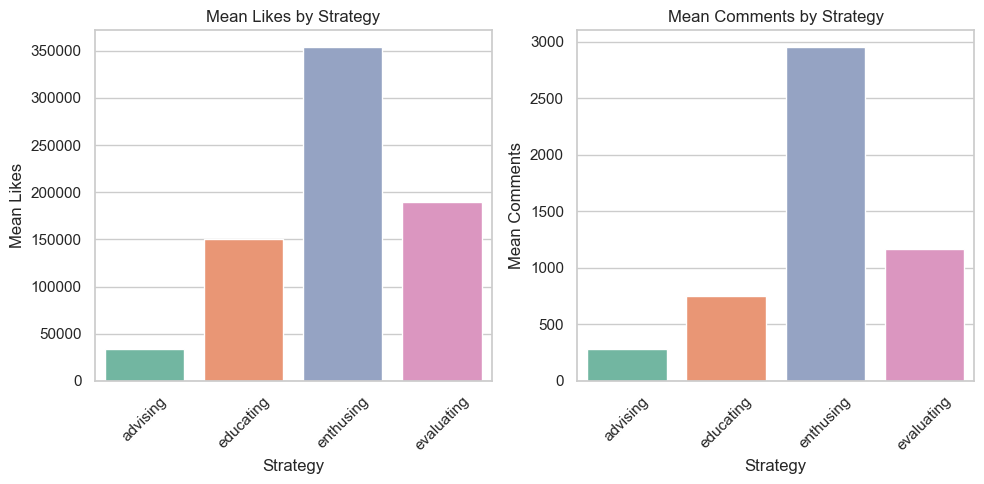

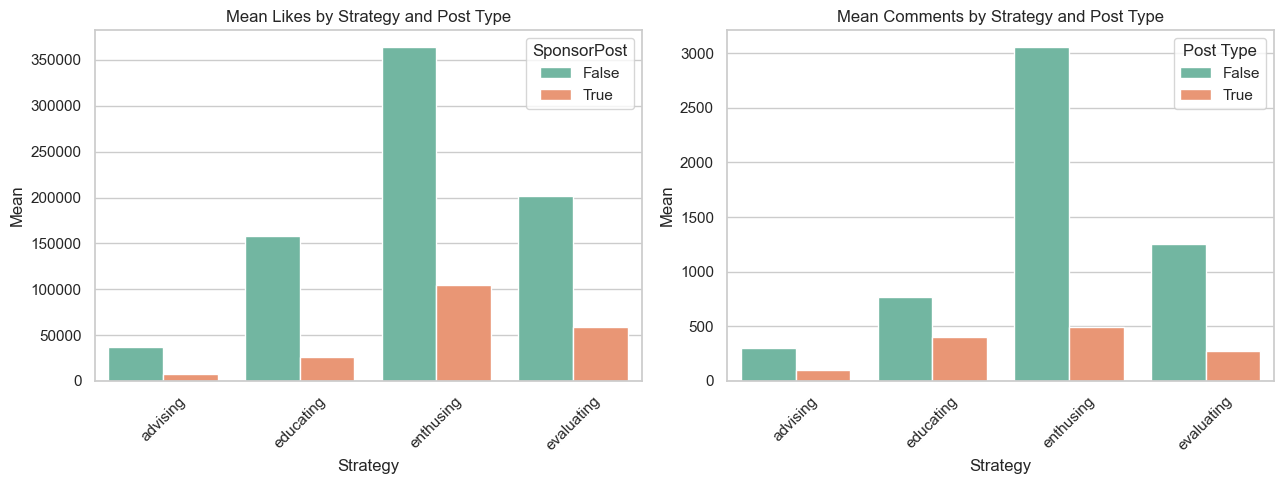

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Calculate the proportion of each strategy
strategy_counts = data['narrative'].value_counts()
total_strategies = len(data)
strategy_proportions = strategy_counts / total_strategies

# Create a bar chart for strategy proportions
plt.figure(figsize=(5, 4))
sns.barplot(x=strategy_proportions.index, y=strategy_proportions.values, palette=custom_palette)
plt.title('Proportion of Each Strategy')
plt.xlabel('Strategy')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate mean and SD for the number of likes and comments of each narrative
likes_mean_sd = data.groupby('narrative')['Likes'].agg(['mean', 'std']).reset_index()
comments_mean_sd = data.groupby('narrative')['Comment'].agg(['mean', 'std']).reset_index()

print("\nMean and SD for Likes and Comments of each narrative:")
print(likes_mean_sd)
print(comments_mean_sd)

# Create a bar chart for mean Likes and Comments by strategy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart for mean Likes by strategy
sns.barplot(data=likes_mean_sd, x='narrative', y='mean', palette=custom_palette, ax=ax1)
ax1.set_title('Mean Likes by Strategy')
ax1.set_xlabel('Strategy')
ax1.set_ylabel('Mean Likes')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Bar chart for mean Comments by strategy
sns.barplot(data=comments_mean_sd, x='narrative', y='mean', palette=custom_palette, ax=ax2)
ax2.set_title('Mean Comments by Strategy')
ax2.set_xlabel('Strategy')
ax2.set_ylabel('Mean Comments')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Calculate the mean of Likes and Comments for all posts, no sponsor, and sponsor posts
mean_all_likes = data['Likes'].mean()
mean_all_comments = data['Comment'].mean()

no_sponsor_data = data[data['SponsorPost'] == False]
mean_no_sponsor_likes = no_sponsor_data['Likes'].mean()
mean_no_sponsor_comments = no_sponsor_data['Comment'].mean()

sponsor_data = data[data['SponsorPost'] == True]
mean_sponsor_likes = sponsor_data['Likes'].mean()
mean_sponsor_comments = sponsor_data['Comment'].mean()

# Calculate the mean of Likes and Comments for each strategy based on post type
strategy_post_mean = data.groupby(['narrative', 'SponsorPost'])[['Likes', 'Comment']].mean().reset_index()

# Create a bar chart for mean Likes and Comments of each strategy based on post type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
sns.barplot(data=strategy_post_mean, x='narrative', y='Likes', hue='SponsorPost', palette=custom_palette, ax=ax1)
ax1.set_title('Mean Likes by Strategy and Post Type')
ax1.set_xlabel('Strategy')
ax1.set_ylabel('Mean')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.barplot(data=strategy_post_mean, x='narrative', y='Comment', hue='SponsorPost', palette=custom_palette, ax=ax2)
ax2.set_title('Mean Comments by Strategy and Post Type')
ax2.set_xlabel('Strategy')
ax2.set_ylabel('Mean')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.legend(title='Post Type')
plt.show()


In [8]:
# Calculate the number of sponsor posts based on each narrative
sponsor_post_counts = data.groupby('narrative')['SponsorPost'].sum().reset_index()

# Calculate the total number of posts for each narrative
total_posts_counts = data['narrative'].value_counts().reset_index()
total_posts_counts.columns = ['narrative', 'TotalPosts']

# Merge the sponsor post counts and total posts counts dataframes
merged_counts = pd.merge(sponsor_post_counts, total_posts_counts, on='narrative')

# Calculate the proportion of sponsor posts by narrative
merged_counts['SponsorPostProportion'] = merged_counts['SponsorPost'] / merged_counts['TotalPosts']

# Print the narrative, sponsor post count, and proportion
print("\nSponsor Post Proportions by Narrative:")
print(merged_counts[['narrative', 'SponsorPost', 'SponsorPostProportion']])


Sponsor Post Proportions by Narrative:
    narrative  SponsorPost  SponsorPostProportion
0    advising           19               0.118012
1   educating           13               0.059091
2   enthusing           99               0.039069
3  evaluating           54               0.081325


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nrclex import NRCLex

# Download necessary resources
nltk.download([
    "names", "state_union", "movie_reviews",
    "averaged_perceptron_tagger", "vader_lexicon", "punkt", "stopwords", "wordnet", "words"
])

# Load data
data = pd.read_csv("updated_file_with_topics.csv")

# Drop rows with N/A values in the 'Processed_Text' column
data = data.dropna(subset=['Processed_Text'])

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define the set of English words
english_words = set(nltk.corpus.words.words())

# Function to determine if a tweet is neutral, positive, or negative
def classify_sentiment(tweet: str) -> str:
    sentiment_scores = sia.polarity_scores(tweet)
    compound_score = sentiment_scores["compound"]
    
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Extract combined features using TF-IDF, Sentiment, and Emotion Lexicon
def combined_features(text):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    tfidf_features = tfidf_vectorizer.get_feature_names_out()

    sentiment_type = classify_sentiment(text)
    features = {f'sentiment_type({sentiment_type})': True}

    emotions = NRCLex(text).affect_frequencies
    for emotion, score in emotions.items():
        features[f'emotion({emotion})'] = score

    return features

# Create labeled data for training
labeled_data = [(combined_features(tweet), classify_sentiment(tweet)) for tweet in data['Processed_Text']]

# Split the data into training and testing sets
train_data, test_data = train_test_split(labeled_data, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier using combined features
classifier_combined = SklearnClassifier(MultinomialNB())
classifier_combined.train(train_data)

# Test the classifier and evaluate accuracy
combined_accuracy = nltk.classify.accuracy(classifier_combined, test_data)

print(f"Combined Features Accuracy: {combined_accuracy:.2%}")

# Print classification report for combined features
combined_predictions = [classifier_combined.classify(features) for (features, _) in test_data]

# Add a new column 'Sentiment' to the DataFrame based on preprocessed text
data['Sentiment'] = data['Processed_Text'].apply(lambda tweet: classify_sentiment(tweet))

# Save the DataFrame with the new 'Sentiment' column back to the same CSV file
data.to_csv("updated_file_with_topics.csv", index=False)


[nltk_data] Downloading package names to /Users/mainguyen/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/mainguyen/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mainguyen/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mainguyen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mainguyen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mainguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mainguyen/nltk_data...
[nltk_da

Combined Features Accuracy: 100.00%


264256.1345372461 365638.4658385093 333985.00416666665 2252.11151241535 2673.021739130435 2451.2625


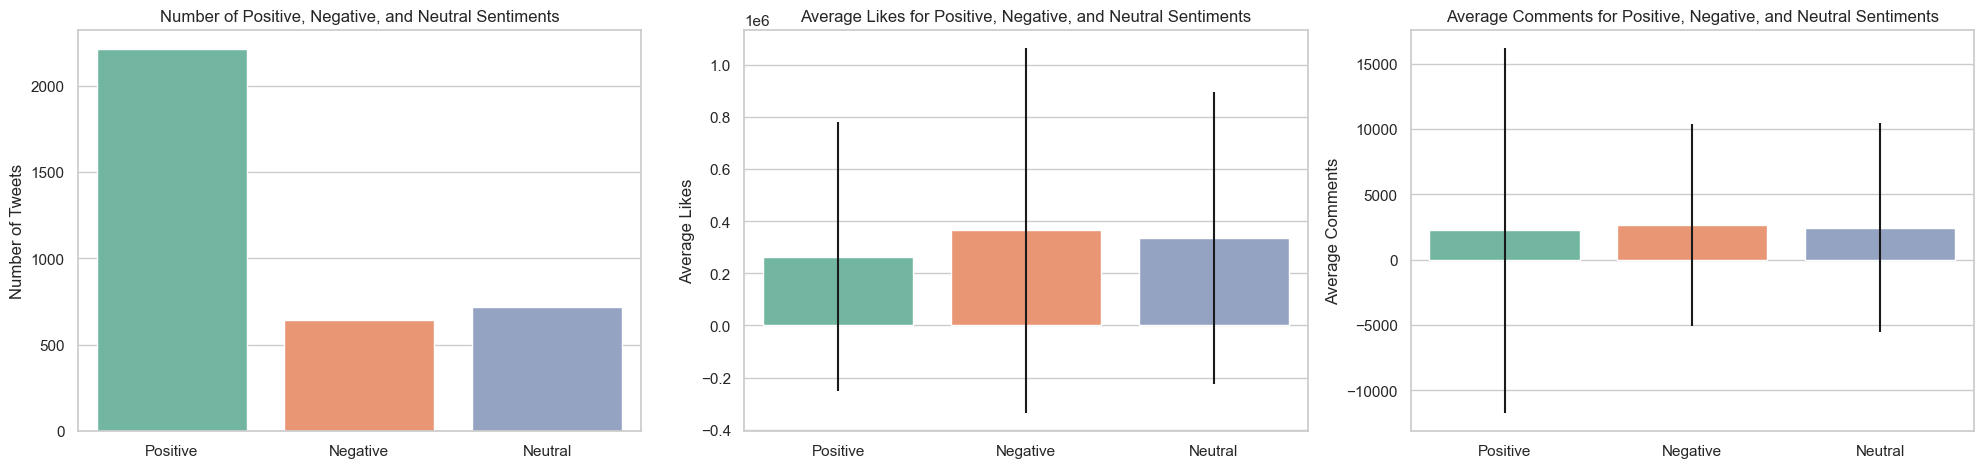

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("Set2")

# Load the data with sentiment column
data = pd.read_csv("updated_file_with_topics.csv")

# Calculate descriptive statistics
positive_tweets = data[data['Sentiment'] == 'Positive']
negative_tweets = data[data['Sentiment'] == 'Negative']
neutral_tweets = data[data['Sentiment'] == 'Neutral']

positive_likes_mean = positive_tweets['Likes'].mean()
positive_likes_std = positive_tweets['Likes'].std()
negative_likes_mean = negative_tweets['Likes'].mean()
negative_likes_std = negative_tweets['Likes'].std()
neutral_likes_mean = neutral_tweets['Likes'].mean()
neutral_likes_std = neutral_tweets['Likes'].std()

positive_comments_mean = positive_tweets['Comment'].mean()
positive_comments_std = positive_tweets['Comment'].std()
negative_comments_mean = negative_tweets['Comment'].mean()
negative_comments_std = negative_tweets['Comment'].std()
neutral_comments_mean = neutral_tweets['Comment'].mean()
neutral_comments_std = neutral_tweets['Comment'].std()

print(positive_likes_mean, negative_likes_mean, neutral_likes_mean,
      positive_comments_mean, negative_comments_mean, neutral_comments_mean)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the number of tweets
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[len(positive_tweets), len(negative_tweets), len(neutral_tweets)],
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Number of Positive, Negative, and Neutral Sentiments')
axes[0].set_ylabel('Number of Tweets')

# Plot the average likes
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[positive_likes_mean, negative_likes_mean, neutral_likes_mean],
            yerr=[positive_likes_std, negative_likes_std, neutral_likes_std], palette=custom_palette, ax=axes[1])
axes[1].set_title('Average Likes for Positive, Negative, and Neutral Sentiments')
axes[1].set_ylabel('Average Likes')

# Plot the average comments
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[positive_comments_mean, negative_comments_mean, neutral_comments_mean],
            yerr=[positive_comments_std, negative_comments_std, neutral_comments_std], palette=custom_palette, ax=axes[2])
axes[2].set_title('Average Comments for Positive, Negative, and Neutral Sentiments')
axes[2].set_ylabel('Average Comments')

plt.tight_layout()
plt.show()


In [303]:
# Count the number of positive, negative, and neutral content
positive_count = len(data[data['Sentiment'] == 'Positive'])
negative_count = len(data[data['Sentiment'] == 'Negative'])
neutral_count = len(data[data['Sentiment'] == 'Neutral'])

# Print the counts
print("Number of Positive Tweets:", positive_count)
print("Number of Negative Tweets:", negative_count)
print("Number of Neutral Tweets:", neutral_count)



# Load the data with sentiment and narrative columns
data = pd.read_csv("updated_file_with_topics.csv")

# Group by narrative and sentiment, and calculate counts
sentiment_counts = data.groupby(['narrative', 'Sentiment']).size().unstack(fill_value=0)

# Calculate total counts for each narrative
total_counts = sentiment_counts.sum(axis=1)

# Calculate percentages
percentage_sentiments = sentiment_counts.divide(total_counts, axis=0) * 100

# Print the percentage sentiment distribution by narrative
print(percentage_sentiments)



Number of Positive Tweets: 2215
Number of Negative Tweets: 644
Number of Neutral Tweets: 720
Sentiment      Negative    Neutral   Positive
narrative                                    
advising      15.527950   4.347826  80.124224
educating     10.454545  10.000000  79.545455
entertaining  19.415943  22.770324  57.813733
evaluating    15.662651  17.168675  67.168675


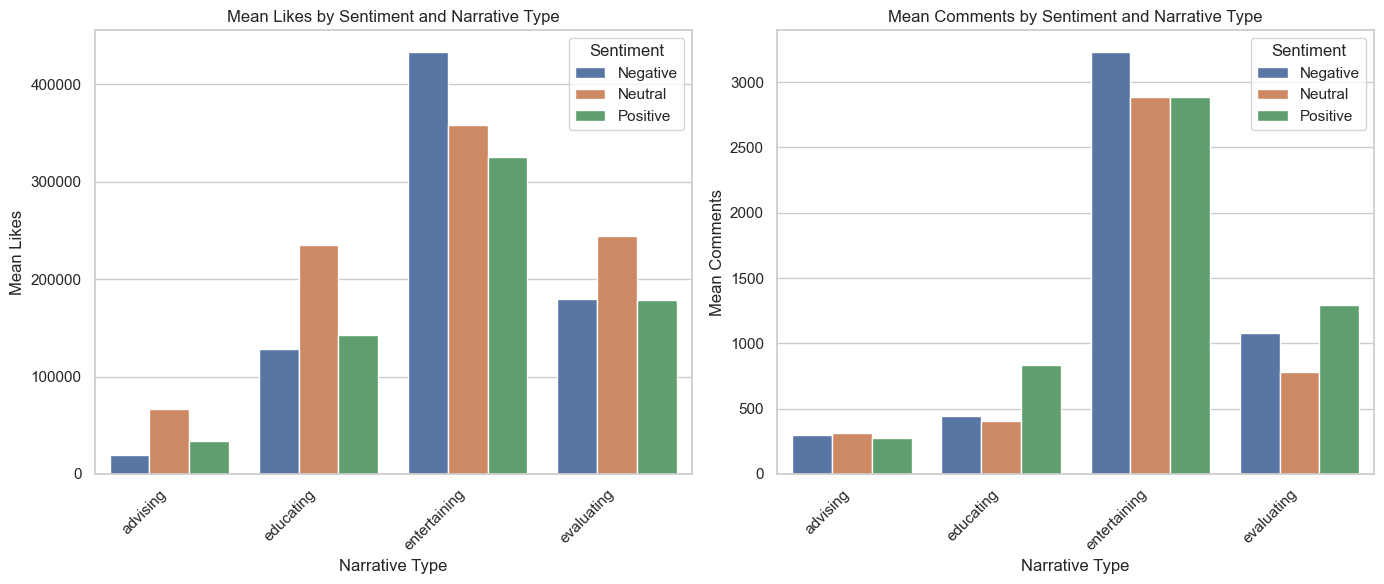

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Calculate mean likes and comments for each sentiment type of each narrative type
sentiment_narrative_means = data.groupby(['narrative', 'Sentiment'])[['Likes', 'Comment']].mean().reset_index()

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for mean Likes by sentiment type and narrative type
sns.barplot(data=sentiment_narrative_means, x='narrative', y='Likes', hue='Sentiment', ax=ax1)
ax1.set_title('Mean Likes by Sentiment and Narrative Type')
ax1.set_xlabel('Narrative Type')
ax1.set_ylabel('Mean Likes')
ax1.legend(title='Sentiment', loc='upper right')

# Bar plot for mean Comments by sentiment type and narrative type
sns.barplot(data=sentiment_narrative_means, x='narrative', y='Comment', hue='Sentiment', ax=ax2)
ax2.set_title('Mean Comments by Sentiment and Narrative Type')
ax2.set_xlabel('Narrative Type')
ax2.set_ylabel('Mean Comments')
ax2.legend(title='Sentiment', loc='upper right')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




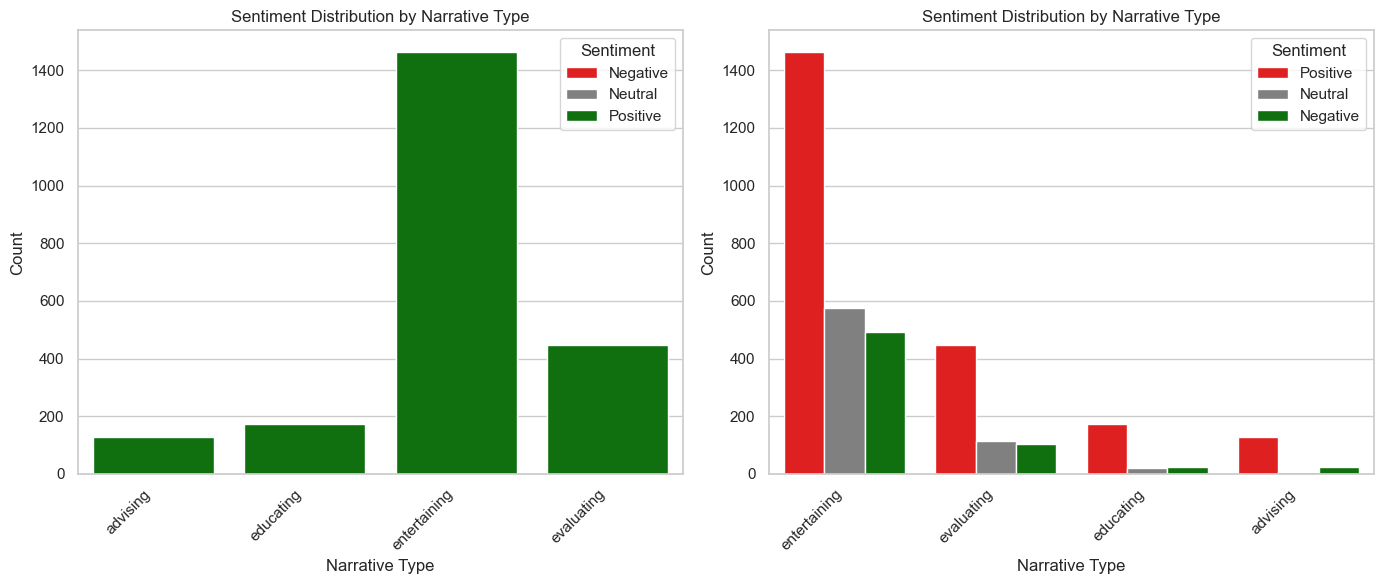

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")

# Calculate the count of each sentiment type for each narrative type
sentiment_narrative_counts = data.groupby(['narrative', 'Sentiment'])['Sentiment'].count().unstack().reset_index()

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for sentiment counts by narrative type
sns.barplot(data=sentiment_narrative_counts, x='narrative', y='Negative', color='red', ax=ax1, label='Negative')
sns.barplot(data=sentiment_narrative_counts, x='narrative', y='Neutral', color='gray', ax=ax1, label='Neutral')
sns.barplot(data=sentiment_narrative_counts, x='narrative', y='Positive', color='green', ax=ax1, label='Positive')

ax1.set_title('Sentiment Distribution by Narrative Type')
ax1.set_xlabel('Narrative Type')
ax1.set_ylabel('Count')
ax1.legend(title='Sentiment', loc='upper right')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Count plot for sentiment distribution by narrative type
sns.countplot(data=data, x='narrative', hue='Sentiment', ax=ax2, palette=['red', 'gray', 'green'])

ax2.set_title('Sentiment Distribution by Narrative Type')
ax2.set_xlabel('Narrative Type')
ax2.set_ylabel('Count')
ax2.legend(title='Sentiment', loc='upper right')

# Rotate x-axis labels for better visibility
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [315]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.anova import anova_lm

# Load the dataset
data = pd.read_csv("updated_file_with_topics.csv")


# Perform MANOVA for narrative and sentiment on likes and comments
manova_data = data[['Likes', 'Comment', 'narrative', 'Sentiment']]
manova_model = MANOVA.from_formula('Likes + Comment ~ C(narrative) + C(Sentiment) + C(narrative):C(Sentiment)', data=manova_data)
manova_results = manova_model.mv_test()

# Print the MANOVA results
print("MANOVA Results:")
print(manova_results)


MANOVA Results:
                    Multivariate linear model
                                                                  
------------------------------------------------------------------
           Intercept        Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 1.0000 2.0000 3566.0000  0.0177 0.9824
             Pillai's trace 0.0000 2.0000 3566.0000  0.0177 0.9824
     Hotelling-Lawley trace 0.0000 2.0000 3566.0000  0.0177 0.9824
        Roy's greatest root 0.0000 2.0000 3566.0000  0.0177 0.9824
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
          C(narrative)      Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9908 6.0000 7132.0000  5.4971 0.0000
